In [88]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

In [89]:
az.style.use("arviz-grayscale")

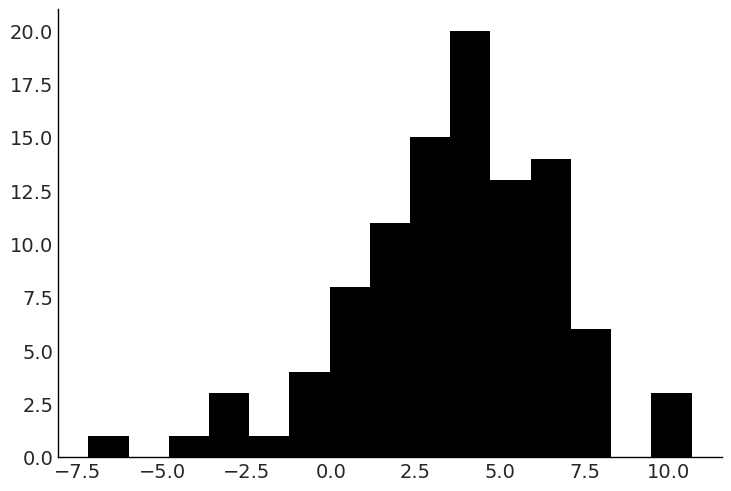

In [90]:
np.random.seed(1234)
n = 100
sample_1 = np.random.normal(3.5, 3, size=n)

plt.hist(sample_1, bins=15)
plt.show()

In [91]:
stats.ttest_1samp(sample_1, 4.)

Ttest_1sampResult(statistic=-1.3146223815270155, pvalue=0.19167422733013625)

In [92]:
std_est = np.std(sample_1)

with pm.Model() as mean_test:
    theta = pm.Uniform("theta", lower=1., upper=5.)
    mu = pm.Normal("mu", mu=theta, sigma=3., observed=sample_1)
    prior = pm.sample_prior_predictive()
    trace = pm.sample()

Sampling: [mu, theta]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


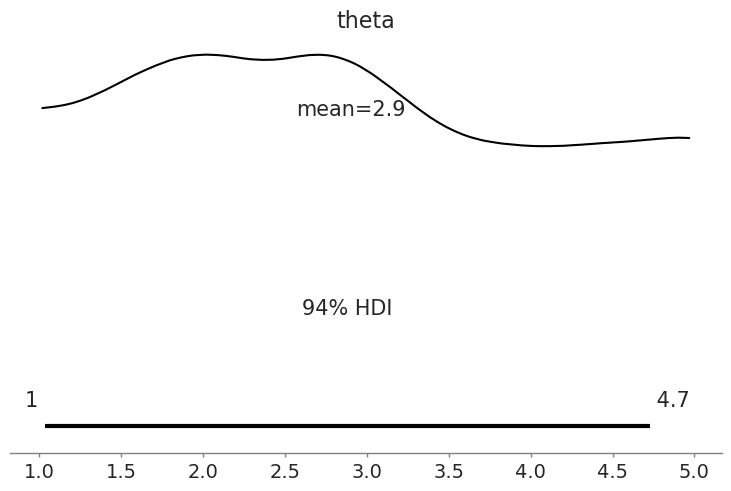

In [93]:
az.plot_posterior(prior.prior)
plt.show()

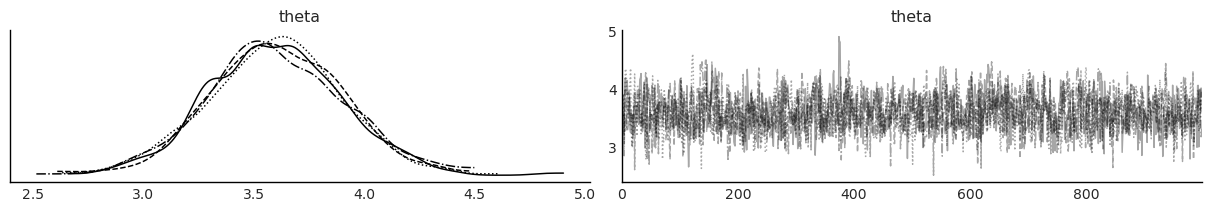

In [94]:
az.plot_trace(trace)
plt.show()

In [95]:
az.summary(trace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  3.599  0.303   3.053    4.194      0.007    0.005    1673.0    1820.0   

       r_hat  
theta    1.0

In [96]:
np.mean((trace.posterior['theta'].sel(chain=0) > 4.153) | (trace.posterior['theta'].sel(chain=0) < 3.038))

<xarray.DataArray 'theta' ()>
array(0.068)
Coordinates:
    chain    int64 0

## 2 Sample test

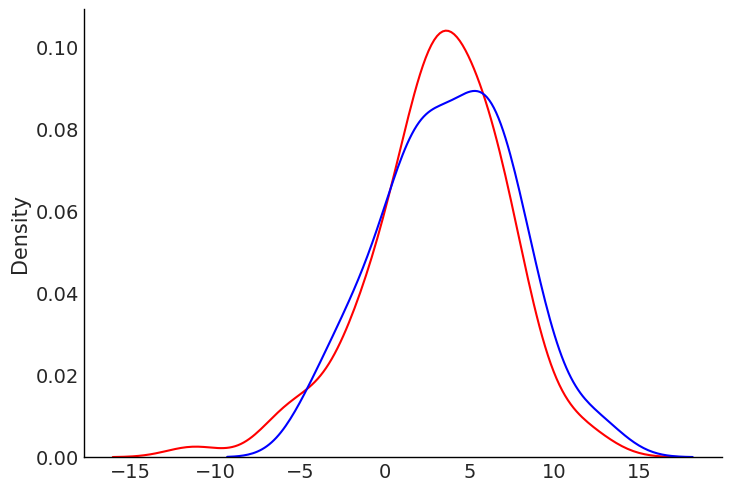

In [102]:
np.random.seed(1234)
sample_2 = np.random.normal(loc=3., scale=4., size=100)
sample_3 = np.random.normal(loc=4., scale=4., size=100)

sns.kdeplot(sample_2, color='red')
sns.kdeplot(sample_3, color='blue')
plt.show()

In [103]:
stats.ttest_ind(sample_2, sample_3)

Ttest_indResult(statistic=-1.1740801084153245, pvalue=0.241773168943232)

In [104]:
with pm.Model() as two_sample_test:
    theta = pm.Uniform("theta", -3, 3)
    mu = pm.Normal("mu", mu=theta, sigma=4., observed=(sample_2 - sample_3))

    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


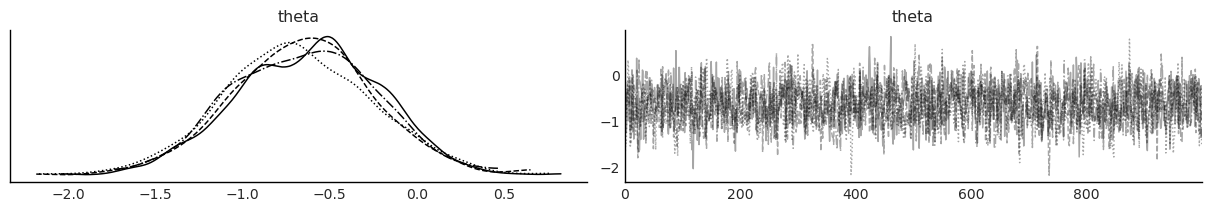

In [105]:
az.plot_trace(trace)
plt.show()

In [106]:
az.summary(trace, kind='stats')

mean     sd  hdi_3%  hdi_97%
theta -0.653  0.412  -1.408    0.122

In [107]:
np.mean(trace.posterior['theta'].sel(chain=0) < 0)

<xarray.DataArray 'theta' ()>
array(0.939)
Coordinates:
    chain    int64 0